# Projekt lesních požárů
* témata: Ekologie, lesní požáry a žhářství, HDP na hlavu, množiny v Pythonu, Vennovy diagramy, průnik množin, modul pandas, kvantily.

## Zadání:
* Představ si, že jsi ambasador OSN pro klimatické změny.
* Máš to těžké, protože stojíš proti zájmům mocných států a korporací.
* Jedním z tvých cílů tedy je najít oblasti, kde i změna ze slabé pozice je možná a bude mít maximální účinek.
* Klimatické změny jsou také nesporně spojeny s extrémním počasím.
* Názorným extrémem je narůstající počet a intenzita lesních požárů ve světě.
* A tak tě napadne, že Jistý podíl těchto požárů musí být způsoben žháři.
* Místo změny klimatu přímo, najděme země, ve kterých nejsou proti žhářům dostatečně tvrdí
* Pokud tyto státy přesvědčíme ke zpřísnění zákonů (což státy dělají mnohem radši než bojují proti klimatické změně), zachránili bychom životy, ušetřili peníze a tuny uvolněného $\mathrm{CO_2}$.

## Otázky:
* Na základě připravených tabulkových dat dostupných na internetu, dokážete identifikovat země, které jsou potencionálně málo přísné vůči žhářům.

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Buňka (cell) se provede kombinací `Shift-Enter`, musíš v ní mít ale kurzor.
* Po úspěšném proběhnutí buňky se objeví nalevo od ní "pořadové" číslo průběhu.
* Provedení buňky a vytvoření nové prázdné pod ní, použij `Alt-Enter`.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto `Alt-Enter`.
---
---

In [ ]:
## Nutné provést jen v prostředí Google colabs
import subprocess
import sys

def instaluj(modul):
    subprocess.call([sys.executable, "-m", "pip", "install", modul])
    
instaluj('wbgapi')

In [1]:
# import potřebných modulů Pythonu
import pandas as pd  # asi nejpoužívanější modul pro analýzu velkáho množství tabulkových dat.
import wbgapi as wb  # modul, který umožňuje přímo importovat statistiky ze světové banky pomocí její API

import matplotlib.pyplot as plt  # Standartní modul pro kreslení grafů
from matplotlib_venn import venn2, venn3  # specifický modul na vykreslení Vennových diagramů

plt.rcParams['figure.facecolor'] = 'white'  # pro venn2, venn3, potřebujeme definovat pozadí grafů
plt.rcParams['figure.figsize'] = [8,6]  # velikost grafu

## Poznámky:
* U těchto typů úloh, mít přesná a důvěryhodná data je často těžký a časově náročný úkol.
* I tak si nemůžeme být jisti, že jsou data naprosto správná.
* Mimoto, některá data prostě nejsou k dipozici (tímto se níže zabývat moc nebudeme)
* Nicméně, jak důležité si myslíte, že je mít k dispozici data ze všech částí světa pro jeho udržitelný a spravedlivý rozvoj?
* Všechna tyto úvahy jsou nesmírně důležitá, hlavně se zodpovědností pozice ambasadora OSN.
---

# Načtení předpřipravených tabulkových dat

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/palec87/pymarad/main/cz/03_mnoziny/data_pozary.csv')  # pandas může načítat mnoho různých struktur
df.set_index('iso', inplace=True)

In [3]:
# zkontrolujme typ df


pandas.core.frame.DataFrame

Nahlédnout, jak naše tabulka vypadá, použijeme `head()` metodu (`tail()` existuje také). Číselný parametr na vstupu kontroluje, počet vypsaných řádků.

In [4]:
# print prvních několik řádek tabulky


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha
iso,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87


In [5]:
# kolik států máme v tabulce celkem (len())


120

# Poznámky k tabulkovým datům.
* Vědecky analizovaná data from pozorování satelitů MODIS slouží jako podklad pro:
    1. Sloupec 'plocha_lesa_ha' pro každou zem, pro jednoduchost jen jedna hodnota v ha.
    2. Sloupec 'spal_plocha_ha' značí spálenou plochu lesa mezi roky 2012-2020 (roky sečteny opět do jedné hodnoty v ha)
    3. MODIS je zkratkou pro Moderate Resolution Imaging Spectroradiometer (přístroj na palubě NASA satelitů Terra a Aqua)
    4. Data jsou dostupná například na stránkách Global Forest Watch ([GFW](https://www.globalforestwatch.org/dashboards/global/?burnedAreaCumulative=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMS0wMS0wNCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTItMjcifQ%3D%3D&burnedAreaRanked=eyJoaWdobGlnaHRlZCI6ZmFsc2V9&category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Iiwid2lkZ2V0U2V0dGluZ3MiXSwic2V0dGluZ3MiOnsic2hvd1Byb21wdHMiOnRydWUsInByb21wdHNWaWV3ZWQiOlsidmlld05hdGlvbmFsRGFzaGJvYXJkcyIsImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJzaGFyZVdpZGdldCJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbInZpZXdOYXRpb25hbERhc2hib2FyZHMiLCJkb3dubG9hZERhc2hib2FyZFN0YXRzIl0sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBJbmRleCI6MCwic3RlcHNLZXkiOiJzaGFyZVdpZGdldCJ9LCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0Iiwic3RlcEluZGV4IjowLCJvcGVuIjpmYWxzZSwiZm9yY2UiOnRydWV9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsImZvcmNlIjp0cnVlfQ%3D%3D&fireAlertStats=eyJjb21wYXJlWWVhciI6MjAxM30%3D&gfwfires=true&location=WyJnbG9iYWwiXQ%3D%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTEuMjkwOTMyMzMxMzg1NzksImxuZyI6MTcuOTA4NjI4NDY0OTc4Njk4fSwiem9vbSI6NC42NDA1NTQxNzQ2MjMzNjQ1LCJkYXRhc2V0cyI6W119))
    
* Změny teploty mohou být také důvodem závažnějsích požárů, teplotní změny jsou dostupné z Food and Agriculture Organization při OSN [FAO](http://www.fao.org/faostat/en/#data/ET)
    1. Teplotní změny uvedeny v porovnání s úrovní mezi roky 1951-1980.
    2. Data jsou původně za každý měsíc pro všechny roky.
    3. Pro yjednodušení jsem je zprůměroval mezi lety 2012-2020 do jedné hodnoty ve sloupci 'zmena_t'
* Úbytek srážek může být dalším důvodem k požárům
    1. Proto máme sloupec 'prum_srazky_mm_rok' v mm za rok (opět jedna hodnota pro každý stát)
    2. Ke stažení z [OSN data](http://data.un.org/Data.aspx?d=CLINO&f=ElementCode%3A06)
* Úroveň rozvoje dané země bude nesmírně důležitá v její schopnosti zabývat se žhářstvým.
    1. Jedním z názorných ukazatelů je HDP na obyvatele (za rok 2020) v dolarech (sloupec 'hdp_per_capita')
    2. Data získána ze stránek [Světové banky](https://data.worldbank.org/indicator)

## Najdeme zlomek shořelých lesů pro každý stát

In [6]:
# nový sloupek se rovná vydělení dvou sloupců
df['zlomek_spaleno'] = 

In [7]:
# znovu začátek tabulky


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075


# Logika projektu
1. Najdi země, které mají velký zlomek spálených lesů
2. Zároveň chceme vyloučit země, které vykazují velké zvýšení teploty, protože to může vysvětlit navýšení požárů.
3. Srážky také nemůžou být příliš nízké, to by mohlo také vysvětlit požáry.
4. Nakonec budeme mít 3 množiny, jejichž průnik znamená silné požáry, které se nedají vysvětlit nárustem teplot, ani nízkým úhrnem srážek.

# Podívejme se nejdřív na Evropu
## Kvantily (quantile)
* Kvantil je hodnota, která rozděluje soubor seřazených hodnot podle velikosti na dvě části v poměru hodnoty kvantilu.
* Příklad: `quantile(0.6)` je hodnota, kdy 60% hodnot souboru je menších, a 40% je větších než hodnota kvantilu.
* Kvantil je proto užitečný pro porovnání států relativně mezi sebou.
* Všimněte si, že `quantile(0.6)` je to samé jako 60-tý percentil, což je metoda, kterou najdete v modulu numpy, `numpy.percentile()`.

In [8]:
# vyber evropské země: Region=='Europe'
df_evropa = df[df.Region=='Europe']

In [9]:
# spálené lesy
# použij metodu quantile() k najití hodnoty, která určí 30% států s největším zlomek_spaleno
velky_spal_limit = df_evropa.zlomek_spaleno.quantile(0.7)  # hodnota rozděluje 30% států, které mají největší zlomek spálenišť

In [10]:
# toto vrací číslo a můžu vám to dokázat


0.0002097197173813884

In [11]:
# podmínka (podobně jako pro vybrání evropských zemí) k vytvoření tabulky df států,
# které mají zlomek_spaleno větší než velky_spal_limit
velky_spal_df = df_evropa[df_evropa.zlomek_spaleno > velky_spal_limit]  # vyber těch 30% států pomocí: sloupec > kvantil

Teď vytvoříme množinu obsahující ISO kody zemí z velky_spal_df, ISO je index našeho df

In [12]:
# příkaz set() aplikovaný DF velky_spal
mnoz_velky_spal = set(velky_spal_df.index)

In [13]:
# vypsat množinu


{'BIH', 'BLR', 'HRV', 'HUN', 'MNE', 'PRT', 'ROU', 'UKR'}

Zopakujme stejný postup pro sloupec `zmena_t` k vytvoření množiny evropských států, které mají změnu teploty NIŽŠÍ než kvantil 0.5

In [14]:
# Ne přílišný nárůst teploty
zmena_t_limit = 

# DF států se zmena_t < zmena_t_limit
ne_velka_zmena_t_df = 

# Vytvoř množinu z DF
mnoz_ne_velka_zmena_t = 

Dotřetice zopakujme postup pro sloupec `prum_srazky_mm_rok` k vytvoření množiny evropských států, které mají srážky VYŠŠÍ než kvantil 0.5

In [15]:
# Ne příliš nízké srážky
srazky_limit = 

# DF států se srážky > srazky_limit
ne_nizke_srazky_df = 

# Vytvoř množinu z DF
mnoz_ne_nizke_srazky = 

Pozn: Není žádné striktní pravidlo, jaké hodnoty kvantilů použít, neboj se experimentovat

### Teď provedeme průnik dvou množin, tj. zemí, které mají velký spal a 'a zároveň' nemají příliš velký teplotní nárůst, který by spal mohl objasnit.

In [16]:
# průnik dvou množin
prunik2 = 

In [17]:
prunik2

{'BIH', 'MNE', 'PRT', 'ROU'}

In [18]:
# použitím metody .loc na náš df, můžeme vypsat státy, které jsou v prunik2
# z originálního df
df.loc[prunik2]

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
MNE,Montenegro,Europe,1.74,241.0,1.066819e+07,3809.97,0.000357
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,4.085507e+07,28669.33,0.000702
ROU,Romania,Europe,1.87,637.0,1.906703e+08,166211.39,0.000872
PRT,Portugal,Europe,1.38,854.0,7.164405e+07,15899.65,0.000222


## Teplota je jen jedním z faktorů
* Extrémně nízké srážky také mohou vysvětlit velký spal
* Přidejme podmínku, že srážky nemohou být příliš nízké
* Těď logicky říkáme: velký spal 'a zároveň' ne velký nárůst teploty 'a zároveň' ne nízké srážky

In [19]:
# průnik 3 množin
prunik3 = 

In [20]:
# výpis států z původního df


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno
iso,,,,,,,
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,40855066.35,28669.33,0.000702
PRT,Portugal,Europe,1.38,854.0,71644045.43,15899.65,0.000222


In [21]:
# Pro zajímavost si vypišme státy s velkým podílem spálenišť
# Nápověda: použij buď .Stat nebo ['Stat'] k výběru sloupce z df


iso
ROU                   Romania
MNE                Montenegro
HRV                   Croatia
HUN                   Hungary
PRT                  Portugal
BLR                   Belarus
UKR                   Ukraine
BIH    Bosnia and Herzegovina
Name: Stat, dtype: object

## Znázornění Vennova diagramu
* Použitím funkcí z modulu matplotlib_venn ukážeme, jak naše množiny sdílejí prvky (Státy)

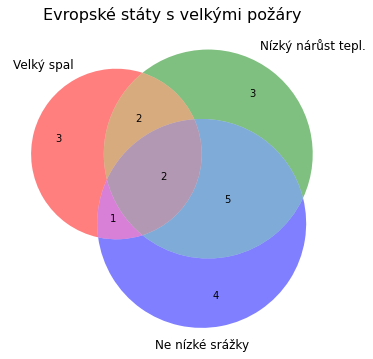

In [22]:
venn3([mnoz_velky_spal, mnoz_ne_velka_zmena_t, mnoz_ne_nizke_srazky],  
      set_labels=('Velký spal', 'Nízký nárůst tepl.', 'Ne nízké srážky'),
      alpha=0.5)
plt.title('Evropské státy s velkými požáry', fontsize=16)
plt.show()

* Naší motivací bylo najít průnik všech tří množin, znázorněný tmavo-fialově.
* Kombinací množinových operací UNION/INTERSECTION můžeme nalézt státy z ostatních podmnožin našeho Vénova diagramu
* Co logicky znamenají, a jsou potencionálně užitečné ambasadorovi při OSN?

---
---
## Porovnávání všech zemí najednou je nejspíš špatný nápad, vzhledem k jejich mnoha rozdílům.
* Neexistuje univerzální odpověď, jak státy seskupovat, zvažte například tyto možnosti:
  * Úroveň rozvoje (HDP)
  * Geografie
  * Klima
  * A další?
* Zde vyzkoušíme rozdělení Států podle HDP na hlavu (per capita), pro porovnání požárů v podobně rozvinutých zemích.
  1. HDP na hlavu (za rok 2020) v dolarech (sloupec 'hdp_per_capita_dolary')
  2. Data stažena ze stránek [Světové Banky](https://data.worldbank.org/indicator)
* Výše jsme vzali geografickou náležitost pro evropské státy, což je možné díky její stejnorodosti, díky její malé velikosti integraci v rámci EU.
* Ale TEĎ použijeme HDP a rozdělení do 4 kategorií podle [Hanse Roslinga](https://www.gapminder.org/factfulness-book/) a projektu [Gapminder](https://www.gapminder.org/), který uvádí na pravou míru zastaralé vnímání rozdělení světa na bohatý sever a chudý jih.

---
---

## Rozdělme tedy státy podle HDP na hlavu (per capita) přidáním sloupce `hdp_uroven` do naší tabulky

In [23]:
# použitím modulu wb můžeme do sešitu natáhnout tabulková data přímo ze Světové banky
# využitím jejich tzv. API
hdp = wb.data.DataFrame('NY.GDP.PCAP.CD', time=2020)
hdp.index.names = ['iso']  # přejmenovat index
df = df.merge(hdp, on='iso')  # sjednotit tabulku hdp s naším df na základě identifikátoru 'iso' (index naší tabulky)

In [24]:
# přejmenovat hdp sloupec
df = df.rename(columns={'NY.GDP.PCAP.CD':'hdp_per_capita_dolary'})

In [25]:
# metoda head()
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary
iso,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,516.747871
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1776.166868
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5246.292306
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8579.017773
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4266.018074


## Příklad
* S Kolika dolary ročně, lidé v 10% nejchudších zemí musí v průměru vyžít?

In [26]:
# Ano, opět je to kvantil


839.9802055909445

In [27]:
# V dolarech na den


2.301315631756012

## Pokud je člověk v extrémní chudobě, musí vyžít s méně než 2 dolary na den. 
* Jak píšeme v úvodu, svět se přesněji nechá rozdělit do 4 kategorií rozvoje (měřeno penězi, což je samozřejmě zavádějící).
* Úrovně začínají na extémní chudobě s 2-2.5$ na den, a pak s násobky 4 následují úrovně další.
* Takže dělící úrovně jsou 2, 8, 32 dolarů na den
* V jaké úrovni se nacházíš ty?

In [28]:
# Musíme tedy přidat ke každé zemi její úroveň hdp
# Nejdřív udělme všem zemím úroveň 4
df['hdp_uroven'] = 4

In [29]:
# Teď postupně projdeme df a pokud je hdp per capita nižší než .., snížíme úroveň o jedna
# hdp v tabulce je za rok, takže musíme úrovně násobit počtem dní v roce, proto 365
df.loc[df['hdp_per_capita_dolary'] < 365*32, 'hdp_uroven'] = 3
df.loc[df['hdp_per_capita_dolary'] < 365*8, 'hdp_uroven'] = 2
df.loc[df['hdp_per_capita_dolary'] < 365*2.5, 'hdp_uroven'] = 1

In [30]:
# zkontrolujme tabulku
df.head()

,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,516.747871,1
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1776.166868,2
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5246.292306,3
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8579.017773,3
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4266.018074,3


In [31]:
# Kolik Států (řádků) máme v df


120

In [32]:
# Vynecháme státy, kde nějaké hodnoty chybí
# Chybějící data jsou typicky označena jako NaN, 'not a number'
# Profesionální by ovšem bylo najít dodatečné zdroje chybějících dat
df.dropna(inplace=True)

In [33]:
# Ze 195 států bohužel v naší studii ignorujeme mnoho lidí našeho světa
len(df)

116

In [34]:
# Kolik zemí na té které HDP úrovni mamé v naší tabulce? 
# Najdeme pomocí metody value_counts(), kterou aplikujeme na sloupec hdp_uroven


3    41
4    32
2    28
1    15
Name: hdp_uroven, dtype: int64

### Dokazující, že dělení do 4 úrovní je smysluplné.

---

# Analýza požárů pro státy úrovně 1
* Zde opakujeme přesně stejné kroky jako pro Evropu
* S výhodou že pracujeme se všemi státy světa, rozdělených dle HDP

In [35]:
# podobně jako vybírání evropských států, vyberte státy úrovně 1
df_l1 = 

In [36]:
# opakování procesu určení států s velkými spáleništi
velky_spal_limit = 
velky_spal_df = 
mnoz_velky_spal = 

In [37]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = 
ne_velka_zmena_t_df =  # opačné znamínko 
mnoz_ne_velka_zmena_t = 

In [38]:
# Státy s ne příliš nízkými srážkami
srazky_limit = 
ne_nizke_srazky_df = 
mnoz_ne_nizke_srazky = 

In [39]:
# průnik dvou množin
prunik2 = 

In [40]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
MLI,Mali,Africa,1.08,282.0,9.800557e+08,2986561.72,0.003047,862.453019,1
TCD,Chad,Africa,1.10,322.0,9.050136e+08,1975335.80,0.002183,659.270045,1


In [41]:
# konečně průnik všech tří množin
prunik3 = 

In [42]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,


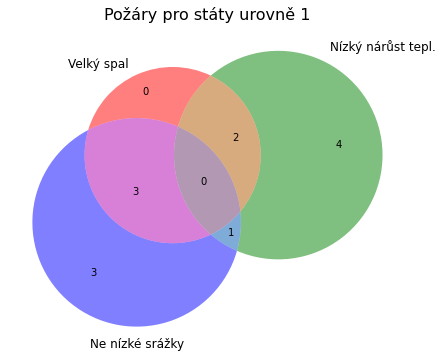

In [43]:

plt.title('Požáry pro státy urovně 1', fontsize=16)
plt.show()

# Závěr pro úroveň 1:
* Zdá se, že žádný stát nevystupuje z řady, kdy by zaznamenal příliš požárů při mírném klimatu
* Požáry v Mali a Čadu se dají vysvětlit nízkými srážkami

# Analýza požárů pro státy úrovně 2

In [44]:
# vyberte státy úrovně 2
df_l2 = 

In [45]:
# určení států s velkými spáleništi
velky_spal_limit = 
velky_spal_df = 
mnoz_velky_spal = 

In [46]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = 
ne_velka_zmena_t_df =  # opačné znamínko 
mnoz_ne_velka_zmena_t = 

In [47]:
# Státy s ne příliš nízkými srážkami
srazky_limit = 
ne_nizke_srazky_df = 
mnoz_ne_nizke_srazky = 

In [48]:
prunik2 = 

In [49]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1543.669258,2
BGD,Bangladesh,Asia,0.92,2666.0,1.115075e+08,409357.40,0.003671,1961.613749,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.261152,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724161,2


In [50]:
prunik3 = 

In [51]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1543.669258,2
BGD,Bangladesh,Asia,0.92,2666.0,1.115075e+08,409357.40,0.003671,1961.613749,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.261152,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724161,2


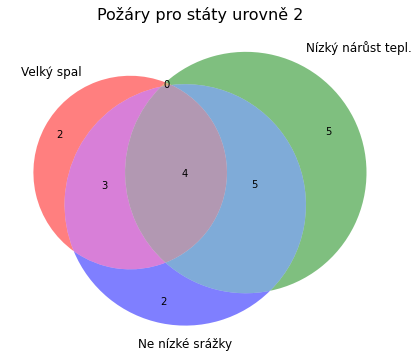

In [52]:

plt.title('Požáry pro státy urovně 2', fontsize=16)
plt.show()

# Závěr pro úroveň 2:
* Nízké srážky neospravedlňují požáry v žádné zemi z prunik2 
* OSN ambasador by mohl zadat svým právníkům podívat se na tyto státy blíže.

# Analýza požárů pro státy úrovně 3

In [53]:
# vyberte státy úrovně 3
df_l3 = 

In [54]:
# určení států s velkými spáleništi
velky_spal_limit = 
velky_spal_df = 
mnoz_velky_spal = 

In [55]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = 
ne_velka_zmena_t_df =  # opačné znamínko 
mnoz_ne_velka_zmena_t = 

In [56]:
# Státy s ne příliš nízkými srážkami
srazky_limit = 
ne_nizke_srazky_df = 
mnoz_ne_nizke_srazky = 

In [57]:
prunik2 = 

In [58]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7186.874092,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4115.177008,3
MEX,Mexico,Americas,1.12,758.0,1.561484e+09,1461080.92,0.000936,8329.271313,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5334.556042,3
CUB,Cuba,Americas,1.12,1335.0,8.858498e+07,552423.82,0.006236,9477.852873,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3000.779327,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,5001.072760,3


In [59]:
prunik3 = 

In [60]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7186.874092,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4115.177008,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5334.556042,3
CUB,Cuba,Americas,1.12,1335.0,8.858498e+07,552423.82,0.006236,9477.852873,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3000.779327,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,5001.072760,3


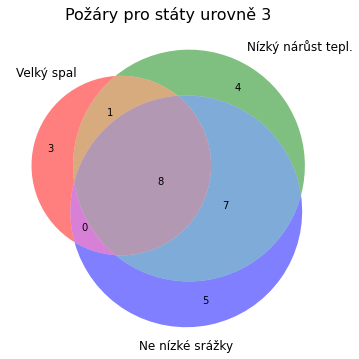

In [61]:

plt.title('Požáry pro státy urovně 3', fontsize=16)
plt.show()

# Závěr pro úroveň 3:
* Nízké srážky vyřadily pouze Mexiko.
* OSN ambasador by se mohl blíže zaměřit na těchto 7 států.

# Analýza požárů pro státy úrovně 4

In [62]:
# vyberte státy úrovně 4
df_l4 = 

In [63]:
# určení států s velkými spáleništi
velky_spal_limit = 
velky_spal_df = 
mnoz_velky_spal = 

In [64]:
# Státy, které netrpí přílišným nárůstem teploty
zmena_t_limit = 
ne_velka_zmena_t_df =  # opačné znamínko 
mnoz_ne_velka_zmena_t = 

In [65]:
# Státy s ne příliš nízkými srážkami
srazky_limit = 
ne_nizke_srazky_df = 
mnoz_ne_nizke_srazky = 

In [66]:
prunik2 = 

In [67]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
JPN,Japan,Asia,0.89,1668.0,2.979226e+08,84111.65,0.000282,40193.252445,4
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
AUS,Australia,Oceania,1.11,534.0,6.150331e+09,6922165.61,0.001125,51692.842748,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12509.835290,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12140.854155,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15425.635109,4


In [68]:
prunik3 = 

In [69]:
# metoda .loc 


,Stat,Region,zmena_t,prum_srazky_mm_rok,plocha_lesa_ha,spal_plocha_ha,zlomek_spaleno,hdp_per_capita_dolary,hdp_uroven
iso,,,,,,,,,
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
JPN,Japan,Asia,0.89,1668.0,2.979226e+08,84111.65,0.000282,40193.252445,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12509.835290,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12140.854155,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15425.635109,4


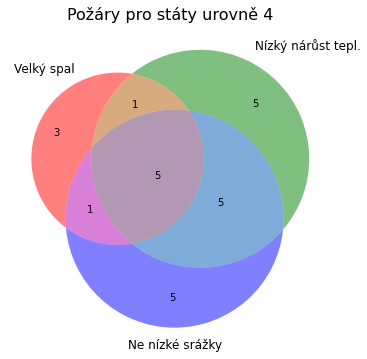

In [70]:

plt.title('Požáry pro státy urovně 4', fontsize=16)
plt.show()

# Závěr pro úroveň 4:
* Střední Amerika se zdá může vylepšit svou situaci s lesními požáry.
* Nebo se jedná o něco specifického pro daný region?
* Netroufám si odpovědět, dejte mi vědět vaše nápady.

# Závěr:
* Vyzkoušeli jste si v tomto cvičení mnoho, zejména užitečnost modulu pandas a DataFramů při práci s tabulkovými daty.
* A to vše s daty z reálného světa, které jsme nakombinovaly z různých zdrojů.
* Jako život sám, je tato úloha otevřená, nemá jasnou odpověď a mnohé se dá vylepšit. Pokud máte nápady, kam tuto metodu posunout, dotoho, můžete zachránit životy. 

---
---

## Otázky k zamyšlení:
1. Kromě průniku tří množin vidíte na grafech mnoho dalších podmonožin. Ty se dají také určit pomocí kombinací metod `union()` a `intersection()`. Co logicky znamenají a mohou ambasadorovi být k něčemu užitečné?
2. Jak už jsme zmínili, naše data jsou neúplná. Jak důležité pro spravedlivý rozvoj světa je zohledňovat v takovýchto analýzách všechny obyvatele světa? Děje se to?
3. V programování definujeme funkce, kdykoli se nám nějaký kód často opakuje. Dokážeš určit, které části projektu by se dali strčit do funkcí?
4. Použití Pythonovských množin a metod `union()` a `intersection()` není jedinou možností. Dokázal bys použít výhradně metod `pandas` k získání našich průniků? Návod v angličtině je [zde](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html).
5. Zkuste použít metodu `describe()` na jeden z nšich DataFramů. Pokuste se porozumět co jednotlivé hodnoty znamenají a jestli některé nesouvisí s kvantily?

# Dobrá práce!!!